# Pandas - explode()

In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [ ]:
df_exploded = df.explode('job_skills')

df_exploded

In [17]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size()

skills_count

job_title_short    job_skills
Business Analyst   airflow        318
                   airtable        17
                   alteryx       1078
                   angular         87
                   ansible        120
                                 ... 
Software Engineer  wrike            4
                   wsl             13
                   xamarin         35
                   yarn           145
                   zoom           229
Length: 2256, dtype: int64

In [ ]:
#counts = df_exploded['job_skills'].value_counts()

df_skills_count = skills_count.reset_index(name="skill_count")

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)

df_skills_count



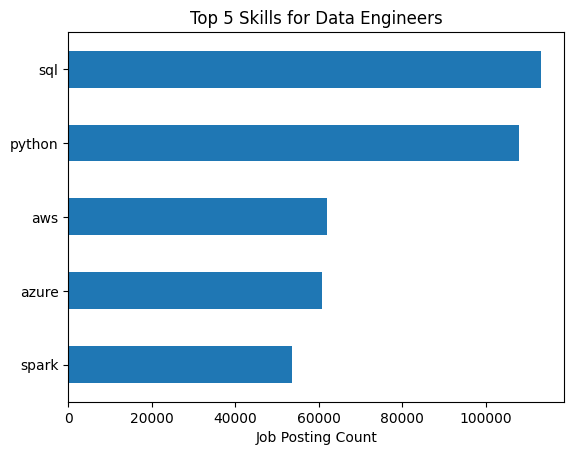

In [34]:
job_title = "Data Engineer"
top_skills = 5

df_skills_final = (df_skills_count[df_skills_count['job_title_short'] == job_title]
                   .head(top_skills)
                   )

df_skills_final.plot(kind = 'barh', x = 'job_skills', y ='skill_count')
plt.gca().invert_yaxis() # Inverts the sorting on the y axis (starts with the highest count on the top)
plt.title(f'Top {top_skills} Skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel("")
plt.legend().set_visible(False)
plt.show()



In [ ]:
#df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')